In [1]:
#importing packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#calling the data
df_train= pd.read_csv('train.csv')
df_test= pd.read_csv('test.csv')

In [75]:
#this comand check the difference in columns... it uses the property of sets 
set(df_train.columns).difference(set(df_test.columns))

{'BsmtFullBath', 'BsmtHalfBath', 'SalePrice'}

In [76]:
set(df_test.columns).difference(set(df_train.columns))

set()

In [79]:
#it prints the shape of the data frame
print(df_test.shape)
print(df_train.shape)

(1457, 205)
(1457, 206)


In [89]:
df_train.columns


Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=206)

In [90]:
df_train['SalePrice'].describe()

count    1457.000000
mean       12.024005
std         0.399853
min        10.460242
25%        11.774520
50%        12.001505
75%        12.273731
max        13.534473
Name: SalePrice, dtype: float64

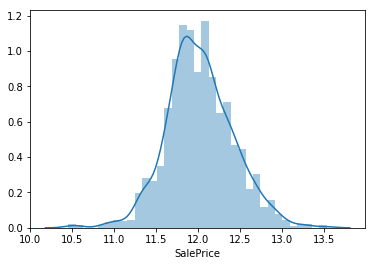

In [91]:
#plot the sale price
sns.distplot(df_train['SalePrice'])

In [92]:
#print the skewed 
print(df_train['SalePrice'].skew())

0.12155100983632659


In [10]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


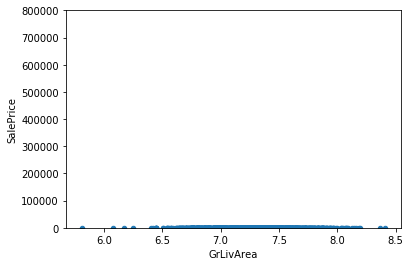

In [93]:
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

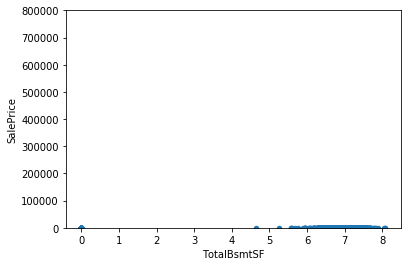

In [94]:
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

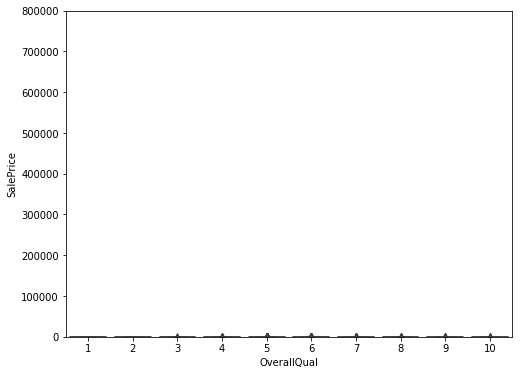

In [95]:
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

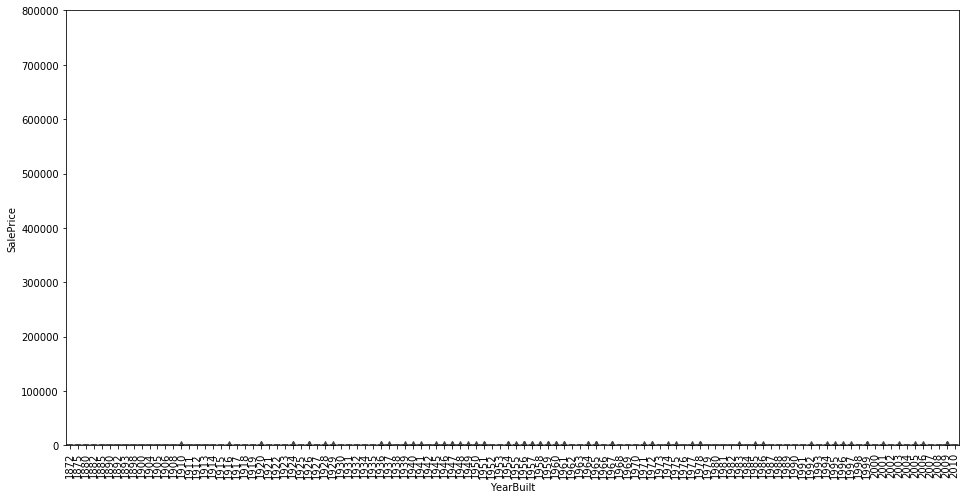

In [96]:
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);


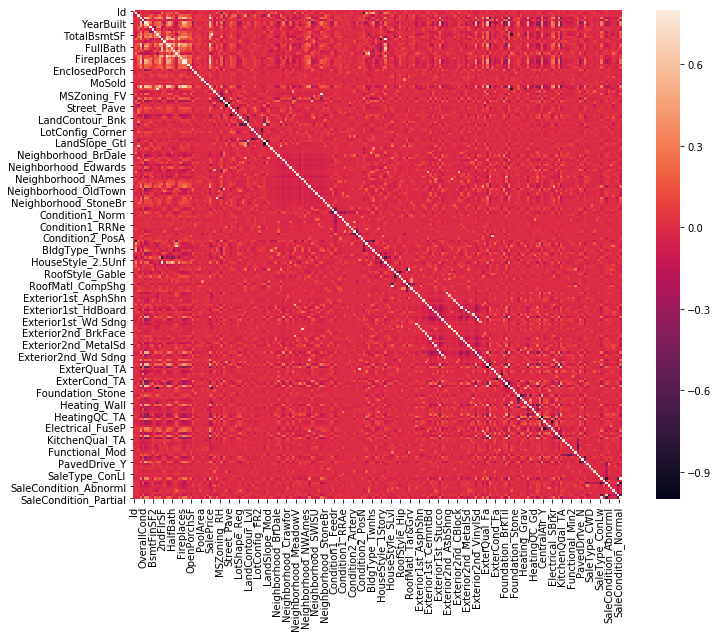

In [97]:
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

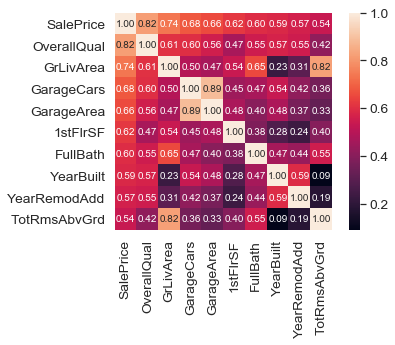

In [98]:
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm= np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

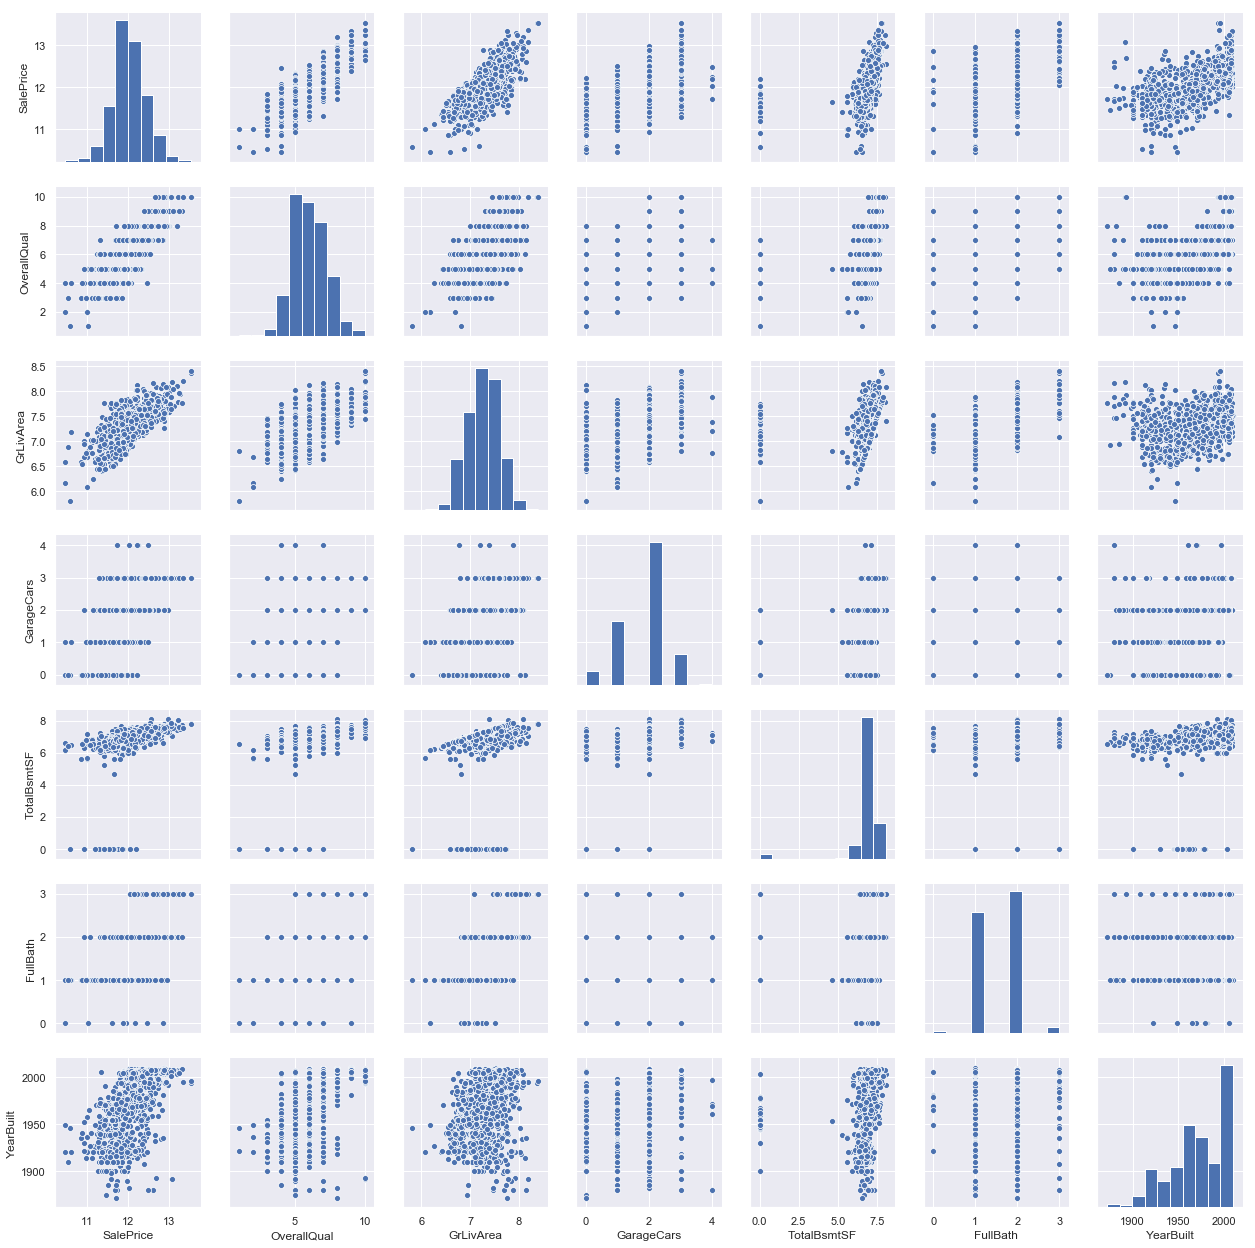

In [99]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

In [18]:
total=df_train.isnull().sum().sort_values(ascending= False)


In [19]:
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)

In [20]:
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [21]:
df_train= df_train.drop((missing_data[missing_data['Total']>1]).index, 1)

In [22]:
df_train=df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)


In [23]:
df_train.isnull().sum().max()

0

In [24]:
saleprice_scaled = StandardScaler().fit_transform(df_train['SalePrice'][:,np.newaxis]);

In [25]:
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]

In [26]:
high_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]

In [27]:
print('outer range (low) of ther distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of ther distribution:
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]

outer range (high) of the distribution:
[[3.82758058]
 [4.0395221 ]
 [4.49473628]
 [4.70872962]
 [4.728631  ]
 [5.06034585]
 [5.42191907]
 [5.58987866]
 [7.10041987]
 [7.22629831]]


In [28]:
df_train.sort_values(by = 'GrLivArea', ascending = False)[:2]


,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,63887,Pave,IR3,Bnk,AllPub,Corner,Gtl,...,0,0,0,480,0,1,2008,New,Partial,160000
523,524,60,RL,40094,Pave,IR1,Bnk,AllPub,Inside,Gtl,...,0,0,0,0,0,10,2007,New,Partial,184750


In [29]:
df_train=df_train.drop(df_train[df_train['Id']==1299].index)

In [30]:
df_train=df_train.drop(df_train[df_train['Id']==524].index)

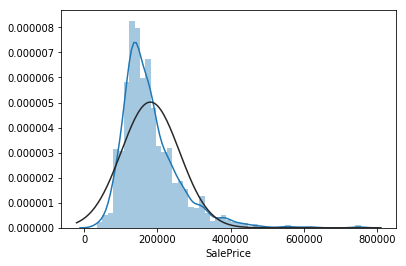

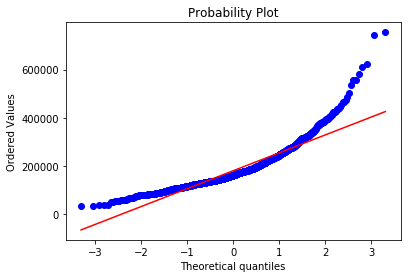

In [31]:
sns.distplot(df_train['SalePrice'],fit=norm)
fig=plt.figure()

res=stats.probplot(df_train['SalePrice'],plot=plt)

In [32]:
df_train['SalePrice']= np.log(df_train['SalePrice'])

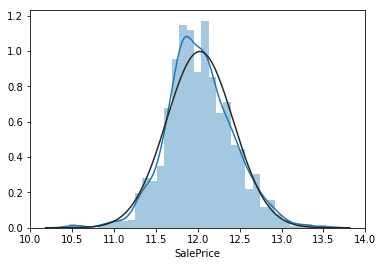

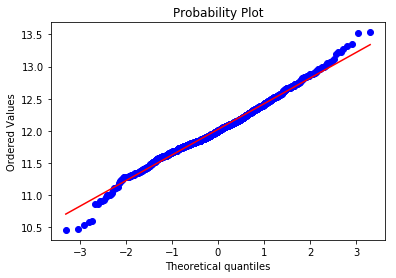

In [33]:
sns.distplot(df_train['SalePrice'],fit=norm)
fig=plt.figure()

res=stats.probplot(df_train['SalePrice'],plot=plt)

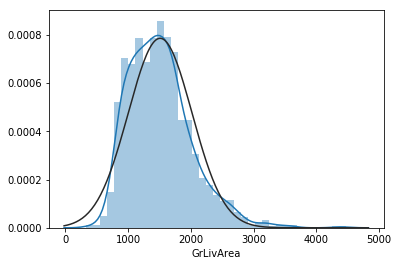

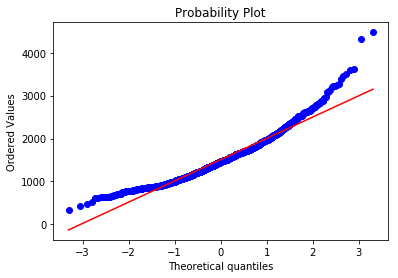

In [34]:
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

In [35]:
df_train['GrLivArea']=np.log(df_train['GrLivArea'])

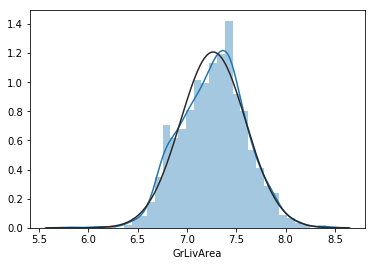

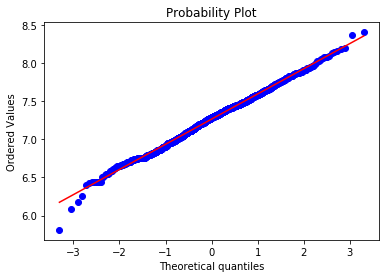

In [36]:
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

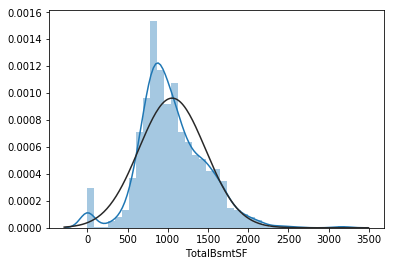

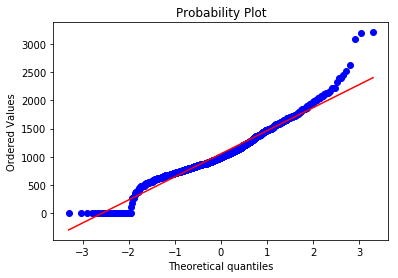

In [37]:
sns.distplot(df_train['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['TotalBsmtSF'], plot=plt)

In [38]:
df_train['HasBsmt'] = pd.Series(len(df_train['TotalBsmtSF']), index=df_train.index)
df_train['HasBsmt'] = 0 
df_train.loc[df_train['TotalBsmtSF']>0,'HasBsmt'] = 1

In [39]:
df_train.loc[df_train['HasBsmt']==1,'TotalBsmtSF'] = np.log(df_train['TotalBsmtSF'])

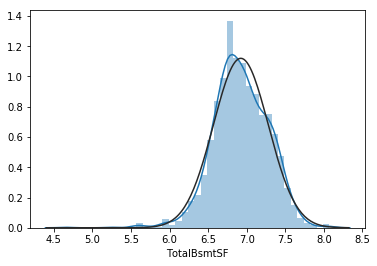

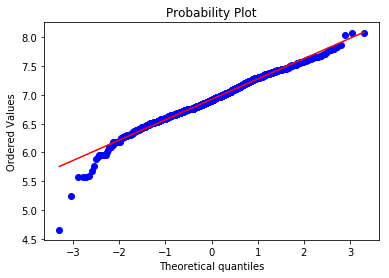

In [40]:
sns.distplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

In [41]:
df_train = pd.get_dummies(df_train)

In [56]:
df_train=df_train.drop(['Condition2_RRAe',
 'Condition2_RRAn',
 'Condition2_RRNn',
 'Electrical_Mix',
 'Exterior1st_ImStucc',
 'Exterior1st_Stone',
 'Exterior2nd_Other',
 'Heating_Floor',
 'Heating_OthW',
 'HouseStyle_2.5Fin',
 'RoofMatl_Membran',
 'RoofMatl_Metal',
 'RoofMatl_Roll',
 'Utilities_NoSeWa'],axis=1)


In [78]:
df_train=df_train.drop(['BsmtFullBath', 'BsmtHalfBath'],axis=1)

In [42]:
#TESTDATA





In [67]:
total1 = df_test.isnull().sum().sort_values(ascending=False)
percent1 = (df_test.isnull().sum()/df_test.isnull().count()).sort_values(ascending=False)
missing_data1 = pd.concat([total1, percent1], axis=1, keys=['Total1', 'Percent1'])
missing_data1.head(20)

,Total1,Percent1
BsmtHalfBath,2,0.001371
BsmtFullBath,2,0.001371
GarageCars,1,0.000685
TotalBsmtSF,1,0.000685
BsmtUnfSF,1,0.000685
BsmtFinSF1,1,0.000685
BsmtFinSF2,1,0.000685
GarageArea,1,0.000685
Neighborhood_NWAmes,0,0.000000
Neighborhood_IDOTRR,0,0.000000


In [68]:
df_test = df_test.drop((missing_data1[missing_data1['Total1'] > 1]).index,1)
df_test = df_test.drop(df_test.loc[df_test['TotalBsmtSF'].isnull()].index)
df_test = df_test.drop(df_test.loc[df_test['BsmtUnfSF'].isnull()].index)
df_test = df_test.drop(df_test.loc[df_test['BsmtFinSF2'].isnull()].index)
df_test = df_test.drop(df_test.loc[df_test['BsmtFinSF1'].isnull()].index)
df_test = df_test.drop(df_test.loc[df_test['GarageCars'].isnull()].index)
df_test = df_test.drop(df_test.loc[df_test['GarageArea'].isnull()].index)
df_test.isnull().sum().max()

0

In [69]:
df_test['GrLivArea'] = np.log(df_test['GrLivArea'])

In [70]:
df_test['HasBsmt'] = pd.Series(len(df_test['TotalBsmtSF']), index=df_test.index)
df_test['HasBsmt'] = 0 
df_test.loc[df_test['TotalBsmtSF']>0,'HasBsmt'] = 1

In [71]:
df_test.loc[df_test['HasBsmt']==1,'TotalBsmtSF'] = np.log(df_test['TotalBsmtSF'])

In [72]:
df_test = pd.get_dummies(df_test)

In [73]:
df_test.shape

(1457, 205)

In [100]:
df_test=df_test.drop(['Alley_Grvl',
 'Alley_Pave',
 'BsmtCond_Fa',
 'BsmtCond_Gd',
 'BsmtCond_Po',
 'BsmtCond_TA',
 'BsmtExposure_Av',
 'BsmtExposure_Gd',
 'BsmtExposure_Mn',
 'BsmtExposure_No',
 'BsmtFinType1_ALQ',
 'BsmtFinType1_BLQ',
 'BsmtFinType1_GLQ',
 'BsmtFinType1_LwQ',
 'BsmtFinType1_Rec',
 'BsmtFinType1_Unf',
 'BsmtFinType2_ALQ',
 'BsmtFinType2_BLQ',
 'BsmtFinType2_GLQ',
 'BsmtFinType2_LwQ',
 'BsmtFinType2_Rec',
 'BsmtFinType2_Unf',
 'BsmtQual_Ex',
 'BsmtQual_Fa',
 'BsmtQual_Gd',
 'BsmtQual_TA',
 'Fence_GdPrv',
 'Fence_GdWo',
 'Fence_MnPrv',
 'Fence_MnWw',
 'FireplaceQu_Ex',
 'FireplaceQu_Fa',
 'FireplaceQu_Gd',
 'FireplaceQu_Po',
 'FireplaceQu_TA',
 'GarageCond_Ex',
 'GarageCond_Fa',
 'GarageCond_Gd',
 'GarageCond_Po',
 'GarageCond_TA',
 'GarageFinish_Fin',
 'GarageFinish_RFn',
 'GarageFinish_Unf',
 'GarageQual_Fa',
 'GarageQual_Gd',
 'GarageQual_Po',
 'GarageQual_TA',
 'GarageType_2Types',
 'GarageType_Attchd',
 'GarageType_Basment',
 'GarageType_BuiltIn',
 'GarageType_CarPort',
 'GarageType_Detchd',
 'GarageYrBlt',
 'LotFrontage',
 'MasVnrArea',
 'MasVnrType_BrkCmn',
 'MasVnrType_BrkFace',
 'MasVnrType_None',
 'MasVnrType_Stone',
 'MiscFeature_Gar2',
 'MiscFeature_Othr',
 'MiscFeature_Shed',
 'PoolQC_Ex',
 'PoolQC_Gd'],axis=1)

IndentationError: unexpected indent (<ipython-input-100-7dc4318d364c>, line 2)

In [83]:
X = df_train.drop('SalePrice',axis=1)
y = df_train['SalePrice']

In [84]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [85]:
X.shape

(1457, 205)

In [86]:
df_test.shape

(1457, 205)

In [87]:
predictions = lm.predict(df_test)

In [88]:
predictions

array([ 9.90179746, 10.01028494, 10.20827679, ..., 10.13230714,
        9.87525881, 10.36028686])